# Preservation of Subgraph Global Stability

In [7]:
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

os.chdir('../core')
import specializer as spec
import sparse_specializer as sp_spec
os.chdir('../test')

plt.rcParams['figure.figsize'] = 10, 5

## Loading Data and Setup

In [2]:
# functions for dynamics
_0 = lambda x: 0 
_1 = lambda x: 1
_2 = lambda x: 2
_3 = lambda x: 3
_4 = lambda x: 4
_5 = lambda x: 5
_6 = lambda x: 6
_7 = lambda x: 7
_8 = lambda x: 8
_9 = lambda x: 9

# define dynamics matrix
self_dynamics = np.array([lambda x: 0]*8)
edge_dynamics = np.array([
    [ _0, _0, _4, _4, _4, _0, _0, _0 ],
    [ _0, _0, _0, _0, _0, _4, _4, _4 ],
    [ _3, _0, _0, _1, _0, _0, _0, _0 ],
    [ _3, _0, _1, _0, _0, _0, _0, _0 ],
    [ _3, _0, _0, _0, _0, _1, _0, _0 ],
    [ _0, _3, _0, _0, _1, _0, _0, _0 ],
    [ _0, _3, _0, _0, _0, _0, _0, _1 ],
    [ _0, _3, _0, _0, _0, _0, _1, _0 ]
])

dynamics = (self_dynamics, edge_dynamics)

# weighted adjacency matrix for the system
A_weighted = np.array([[f(0) for f in row] for row in edge_dynamics])

In [16]:
# initialize the graph object
spA = sp_spec.DirectedGraph(A_weighted, labels=[str(x+1) for x in range(8)],
                            dynamics=dynamics)

# define node positions for initial visual layout
scale = 1   # this will scale the distances between nodes
pos = {'1': (-1.5*scale, 0),
       '2': (1.5*scale, 0),
       '3': (-2.5*scale, 0.25*scale),
       '4': (-2.5*scale, -0.25*scale),
       '5': (-0.5*scale, 0),
       '6': (0.5*scale, 0),
       '7': (2.5*scale, 0.25*scale),
       '8': (2.5*scale, -0.25*scale)
      }

## Original Network Visual

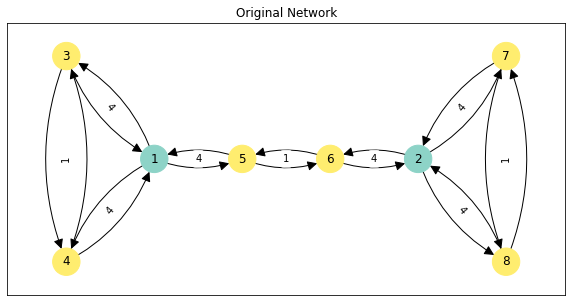

In [17]:
fig, ax = plt.subplots(1, 1)

# plot original network
spA.network_vis(pos=pos, title='Original Network', ax=ax,
                lin=True, lin_dyn=A_weighted, connectionstyle='arc3,rad=0.2')

In [5]:
# initial conditions for dynamic iterations
init_cond = np.random.rand(8)*50
iters = 3

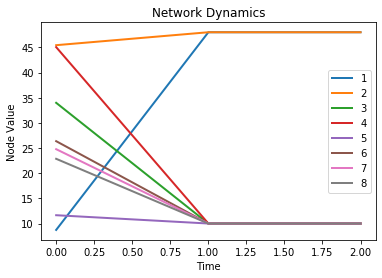

In [6]:
_ = spA.iterate(iters, init_cond, graph=True)

## Specialize Graph on Nodes 5 and 6

In [9]:
# reinitialize spA, so we aren't double specializing
spA = sp_spec.DirectedGraph(A_weighted, labels=[str(x+1) for x in range(8)],
                            dynamics=dynamics)

# specialize on nodes 5 and 6
spA.specialize(['5', '6'])

# new positioning for specializing on 5, 6
pos_56 = {'1.1': (-3,  0),
          '2.2': ( 3,  0),
          '3.1': (-5,  1),
          '4.1': (-5, -1),
          '5':   (-1,  0),
          '6':   ( 1,  0),
          '7.2': ( 5,  1),
          '8.2': ( 5, -1)
      }

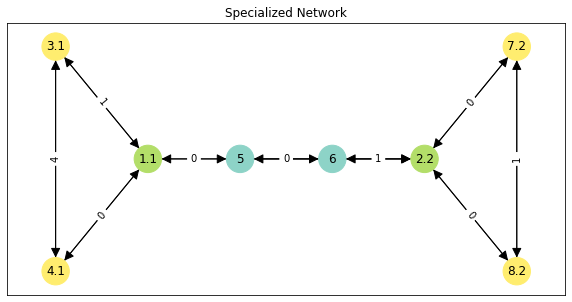

In [10]:
fig, ax = plt.subplots(1, 1)

# plot original network
spA.network_vis(title='Specialized Network', ax=ax, pos=pos_56, lin=True)

In [11]:
spA.A.toarray()

array([[0, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 4, 4, 0, 0, 0],
       [0, 0, 3, 0, 1, 0, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 4, 4],
       [0, 0, 0, 0, 0, 3, 0, 1],
       [0, 0, 0, 0, 0, 3, 1, 0]], dtype=int64)

In [12]:
spA.indexer

{'5': 0, '6': 1, '1.1': 2, '3.1': 3, '4.1': 4, '2.2': 5, '7.2': 6, '8.2': 7}

In [13]:
test = nx.DiGraph(spA.A.toarray().T)

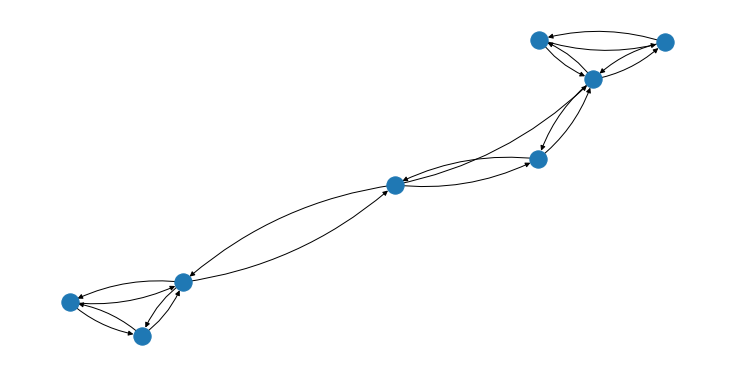

In [14]:
nx.draw(test, connectionstyle='arc3,rad=0.15')